# Copy of the Original

**A Trial Notebook**

First, we try to import numpy package.

In [8]:
from scipy.io import loadmat
import pandas as pd
from sklearn import preprocessing, cluster, metrics
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from time import time

In [9]:
water = loadmat('OrderParam_Run21_swm4ndp_T-20.0.mat')
water1 = loadmat('OrderParamZeta_Run21_swm4ndp_T-20.0.mat')

q_all = []
for i in range(0,20):
    q_all.extend(water['q_all'][i])
Q6_all = []
for i in range(0,20):
    Q6_all.extend(water['Q6_all'][i])
LSI_all = []
for i in range(0,20):
    LSI_all.extend(water['LSI_all'][i])
Sk_all = []
for i in range(0,20):
    Sk_all.extend(water['Sk_all'][i])
zeta_all = []
for i in range(0,20):
  zeta_all.extend(water1['zeta_all'][i])


data = {'q_all': q_all,
        'Q6_all': Q6_all,
        'LSI_all': LSI_all,
        'Sk_all': Sk_all,
        'zeta_all': zeta_all
        }

df = pd.DataFrame(data)

# Scaling the data
scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Scaled DataFrame columns:", df_scaled.columns)

Scaled DataFrame columns: Index(['q_all', 'Q6_all', 'LSI_all', 'Sk_all', 'zeta_all'], dtype='object')


Number of clusters: 1
Silhouette Score cannot be calculated because there is only one cluster.


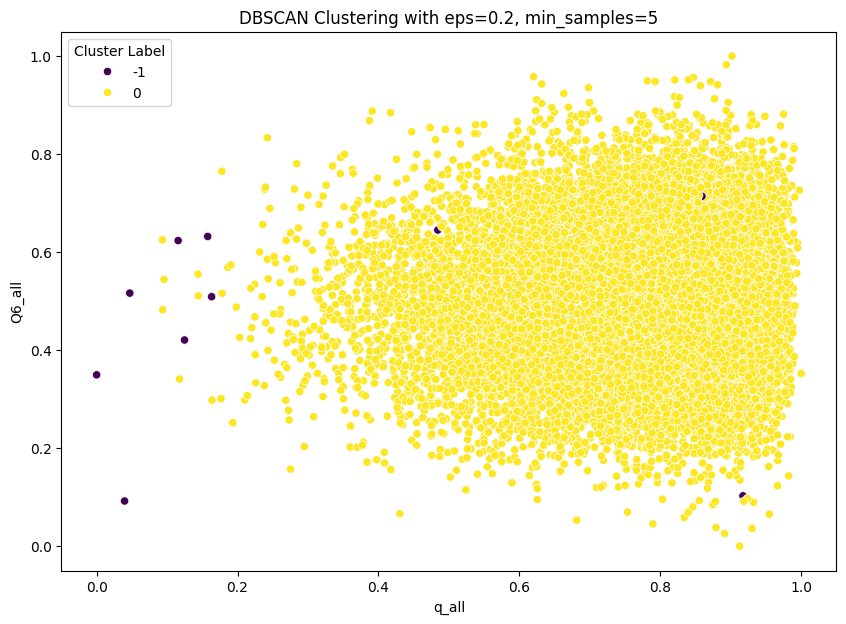

In [11]:
#INDIVIUAL CLUSTERING (TO CHANGE SCALING)

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Apply DBSCAN clustering
eps = 0.2  # Adjust this parameter as needed
min_samples = 5  # Adjust this parameter as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit and predict clusters
labels = dbscan.fit_predict(df_scaled)
df_scaled['labels'] = labels

# Check the number of clusters (excluding noise)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {num_clusters}")

# Evaluate silhouette score if there are at least 2 clusters
if num_clusters > 1:
    sil_score = silhouette_score(df_scaled.drop('labels', axis=1)[labels != -1],
                                 labels[labels != -1])
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("Silhouette Score cannot be calculated because there is only one cluster.")

# Visualizing the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df_scaled['q_all'],
    y=df_scaled['Q6_all'],
    hue=labels,
    palette='viridis',
    legend="full"
)
plt.title(f"DBSCAN Clustering with eps={eps}, min_samples={min_samples}")
plt.xlabel('q_all')
plt.ylabel('Q6_all')
plt.legend(title="Cluster Label")
plt.show()

Optimal eps for 2 clusters: 0.3387755102040817
Number of clusters: 2
Silhouette Score: 0.6624


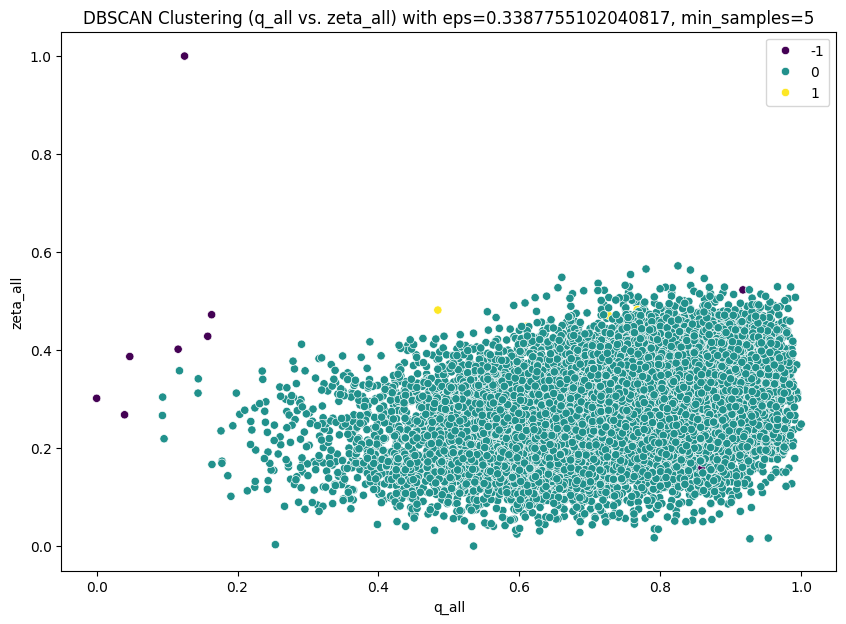

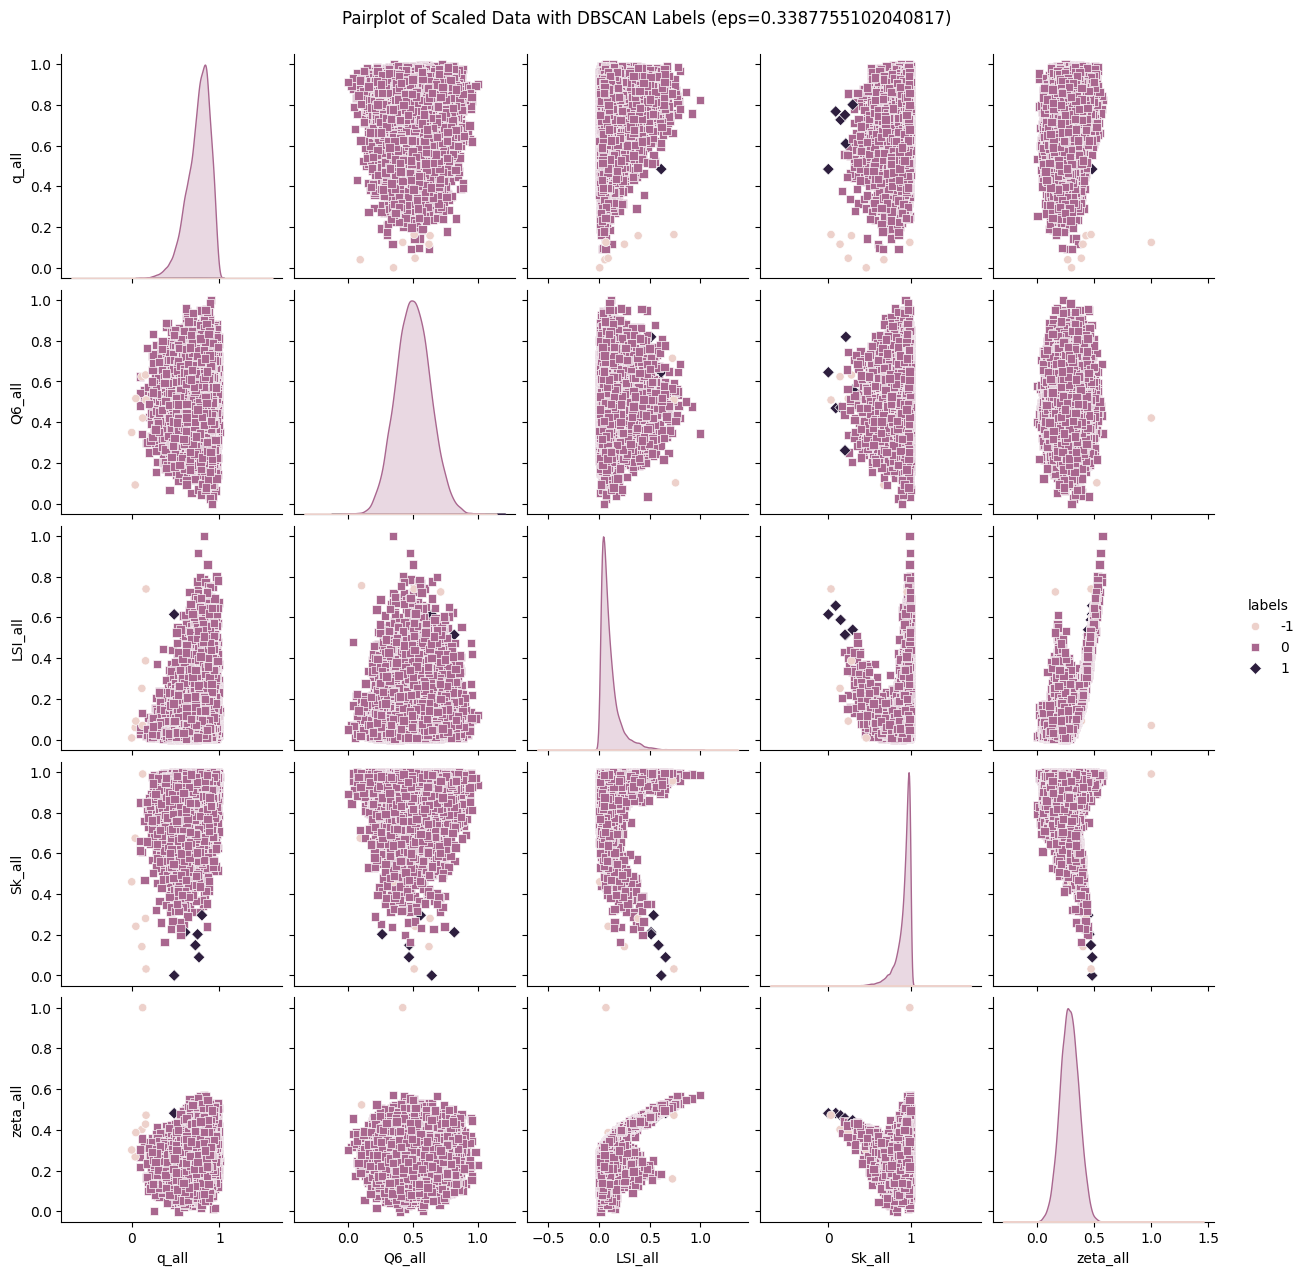

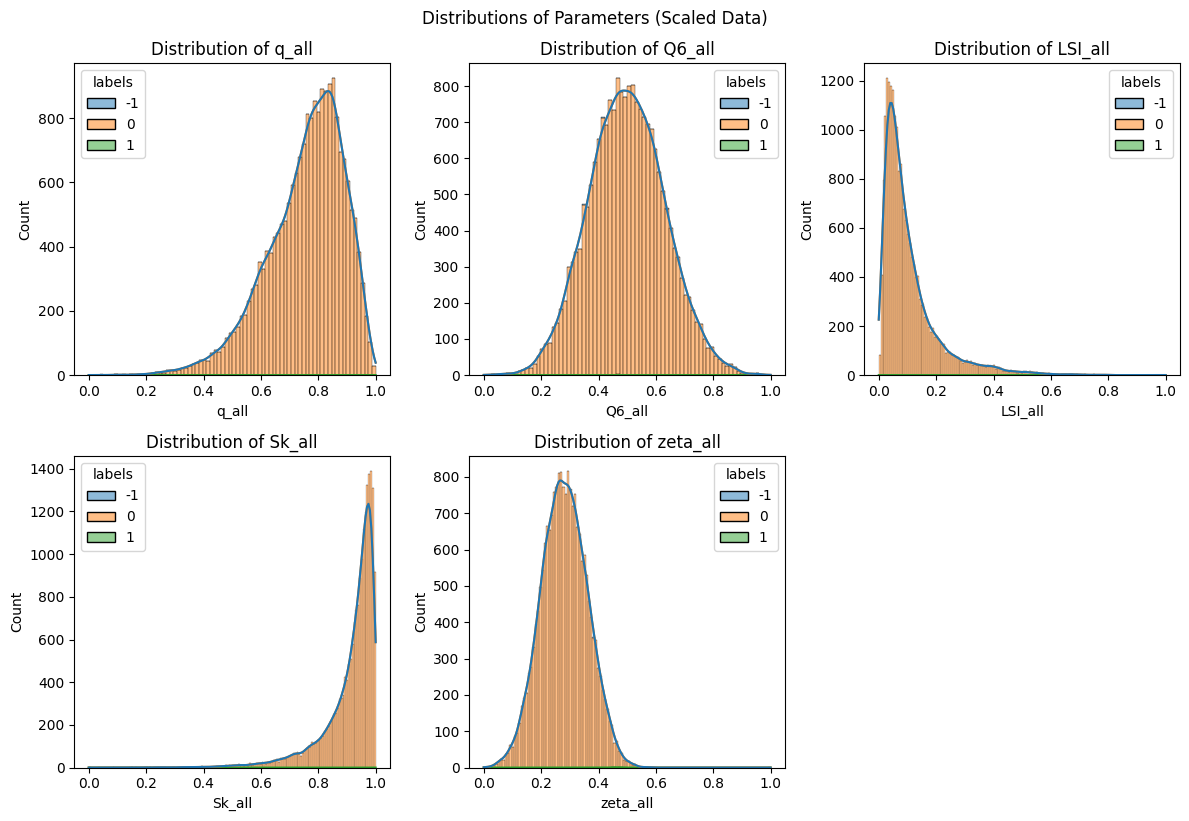

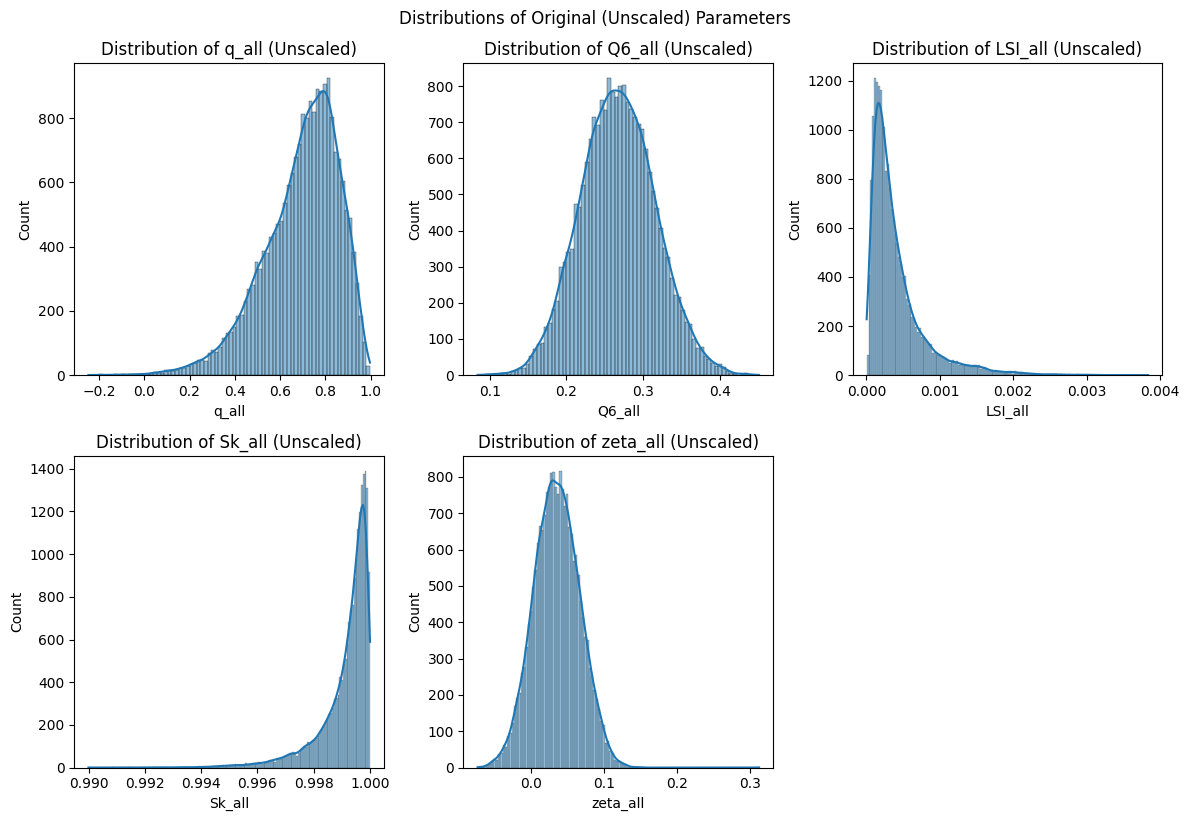

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Function to find optimal DBSCAN parameters for 2 clusters
def find_eps_for_two_clusters(df_scaled, eps_values, min_samples=5):
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters == 2:
            return eps, labels
    return None, None

# Parameter tuning
eps_values = np.linspace(0.1, 1.0, 50)  # Try a range of eps values
min_samples = 5  # You can also tune this if needed
eps_optimal, labels_optimal = find_eps_for_two_clusters(df_scaled, eps_values, min_samples)

if eps_optimal is not None:
    print(f"Optimal eps for 2 clusters: {eps_optimal}")
    dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples)
    labels = dbscan.fit_predict(df_scaled)
    df_scaled['labels'] = labels

    # Count clusters and evaluate
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f'Number of clusters: {n_clusters}')

    if n_clusters > 1:
        sil_score = silhouette_score(df_scaled.drop('labels', axis=1)[labels != -1],
                                     labels[labels != -1])
        print(f'Silhouette Score: {sil_score:.4f}')
    else:
        print("Silhouette Score cannot be calculated because there is only one cluster.")

    # Visualize clustering results using zeta
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=df_scaled['q_all'], y=df_scaled['zeta_all'], hue=labels, palette='viridis', legend='full')
    plt.title(f"DBSCAN Clustering (q_all vs. zeta_all) with eps={eps_optimal}, min_samples={min_samples}")
    plt.xlabel("q_all")
    plt.ylabel("zeta_all")
    plt.show()

    # Pairplot for all features
    sns.pairplot(df_scaled, hue='labels', markers=["o", "s", "D"])
    plt.suptitle(f"Pairplot of Scaled Data with DBSCAN Labels (eps={eps_optimal})", y=1.02)
    plt.show()

    # Distribution plots for scaled data
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(df_scaled.columns[:-1], 1):
        plt.subplot(2, 3, i)
        sns.histplot(data=df_scaled, x=column, hue='labels', multiple='stack', palette='tab10', kde=True)
        plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.suptitle("Distributions of Parameters (Scaled Data)", y=1.02)
    plt.show()

    # Distribution plots for original data
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Distribution of {column} (Unscaled)')
    plt.tight_layout()
    plt.suptitle("Distributions of Original (Unscaled) Parameters", y=1.02)
    plt.show()
else:
    print("Could not find parameters that result in exactly 2 clusters.")

DBSCAN clustering time: 3.53 sec
Number of clusters: 1
Silhouette Score cannot be calculated because there is only one cluster.


C:\Users\OhhMoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\OhhMoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\OhhMoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\OhhMoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages

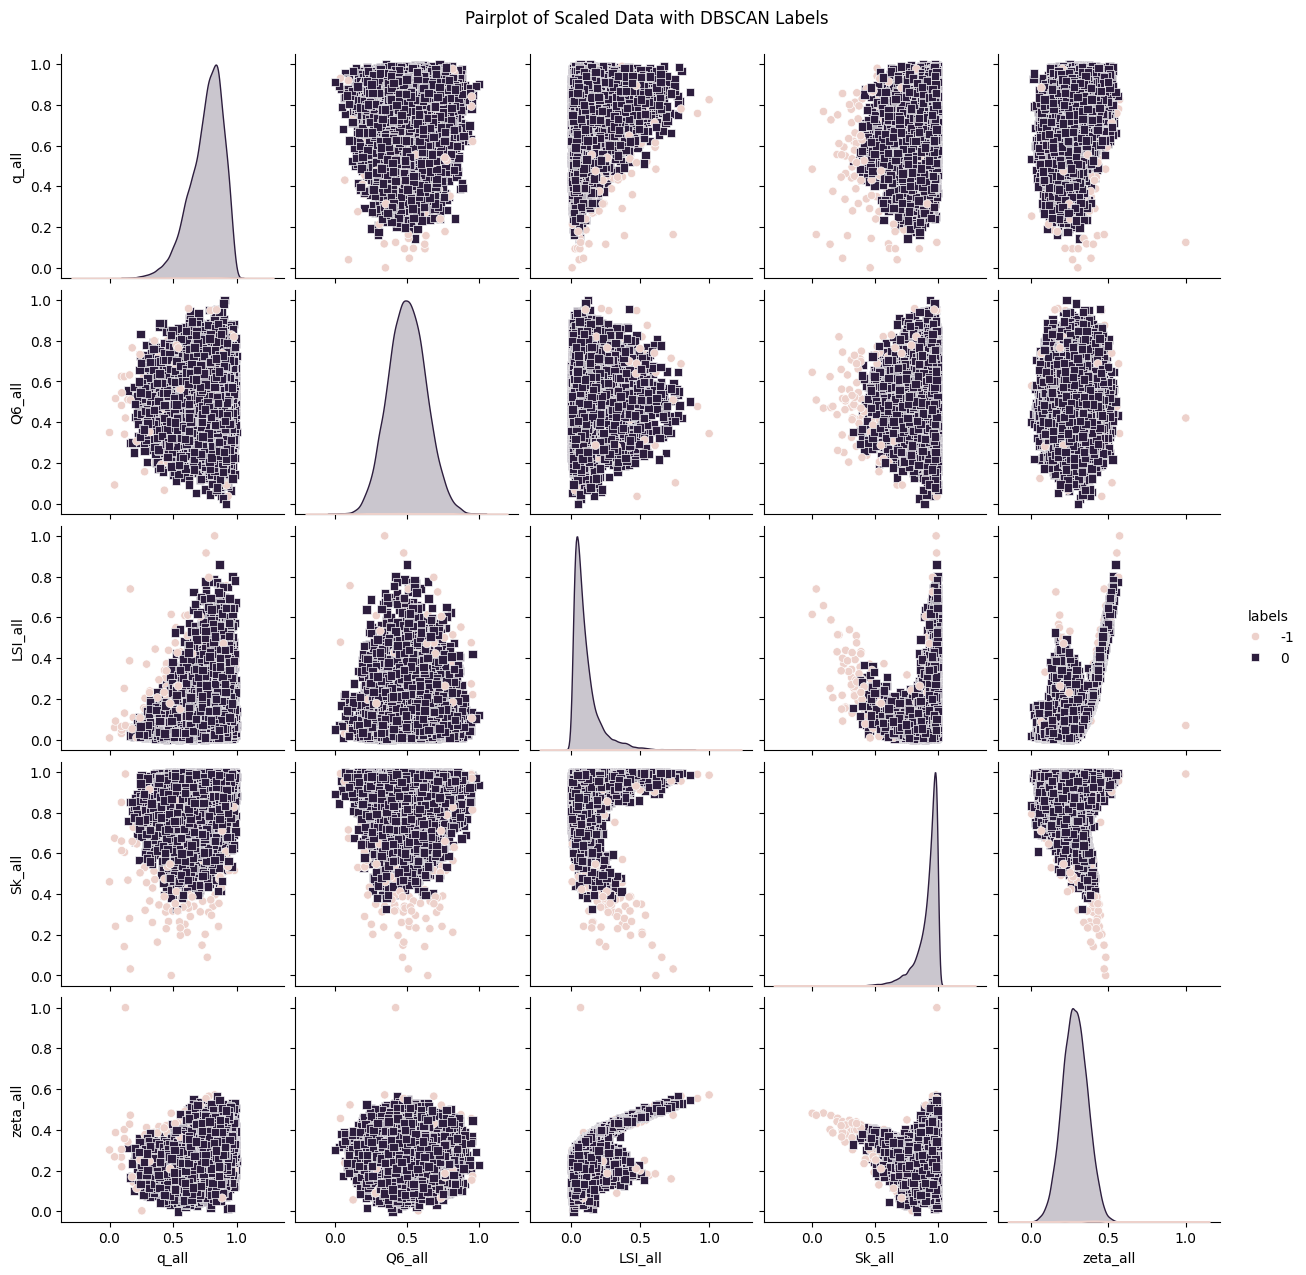

ValueError: num must be an integer with 1 <= num <= 4, not 5

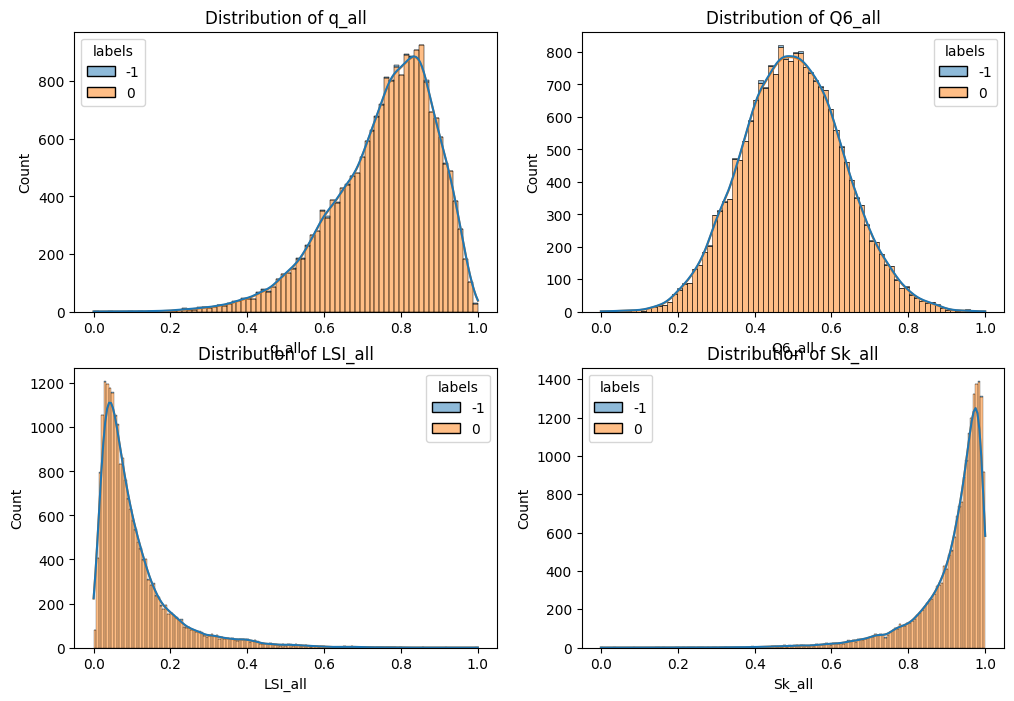

In [13]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
t0 = time()
dbscan = DBSCAN(eps=0.11, min_samples=5)  # You may need to adjust these parameters
labels = dbscan.fit_predict(df_scaled)
t1 = time()
print(f"DBSCAN clustering time: {t1 - t0:.2f} sec")

# Add labels to the dataframe
df_scaled['labels'] = labels

# Count the number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

# Evaluating the clustering (only for non-noise points)
if len(set(labels)) - (1 if -1 in labels else 0) > 1:  # Check for at least two clusters (excluding noise)
    sil_score = silhouette_score(df_scaled.drop('labels', axis=1)[labels != -1],
                                 labels[labels != -1])
    print(f'Silhouette Score: {sil_score:.4f}')
else:
    print("Silhouette Score cannot be calculated because there is only one cluster.")

# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Scaled Data with DBSCAN Labels", y=1.02)
plt.show()

# Plotting the distributions to see the actual data distribution
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='stack', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.suptitle("Distributions of Parameters", y=1.02)
plt.show()

# Plotting original (unscaled) data distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column} (Unscaled)')
plt.tight_layout()
plt.suptitle("Distributions of Original (Unscaled) Parameters", y=1.02)
plt.show()

KMeans clustering time: 2.41 sec
Silhouette Score: 0.2468


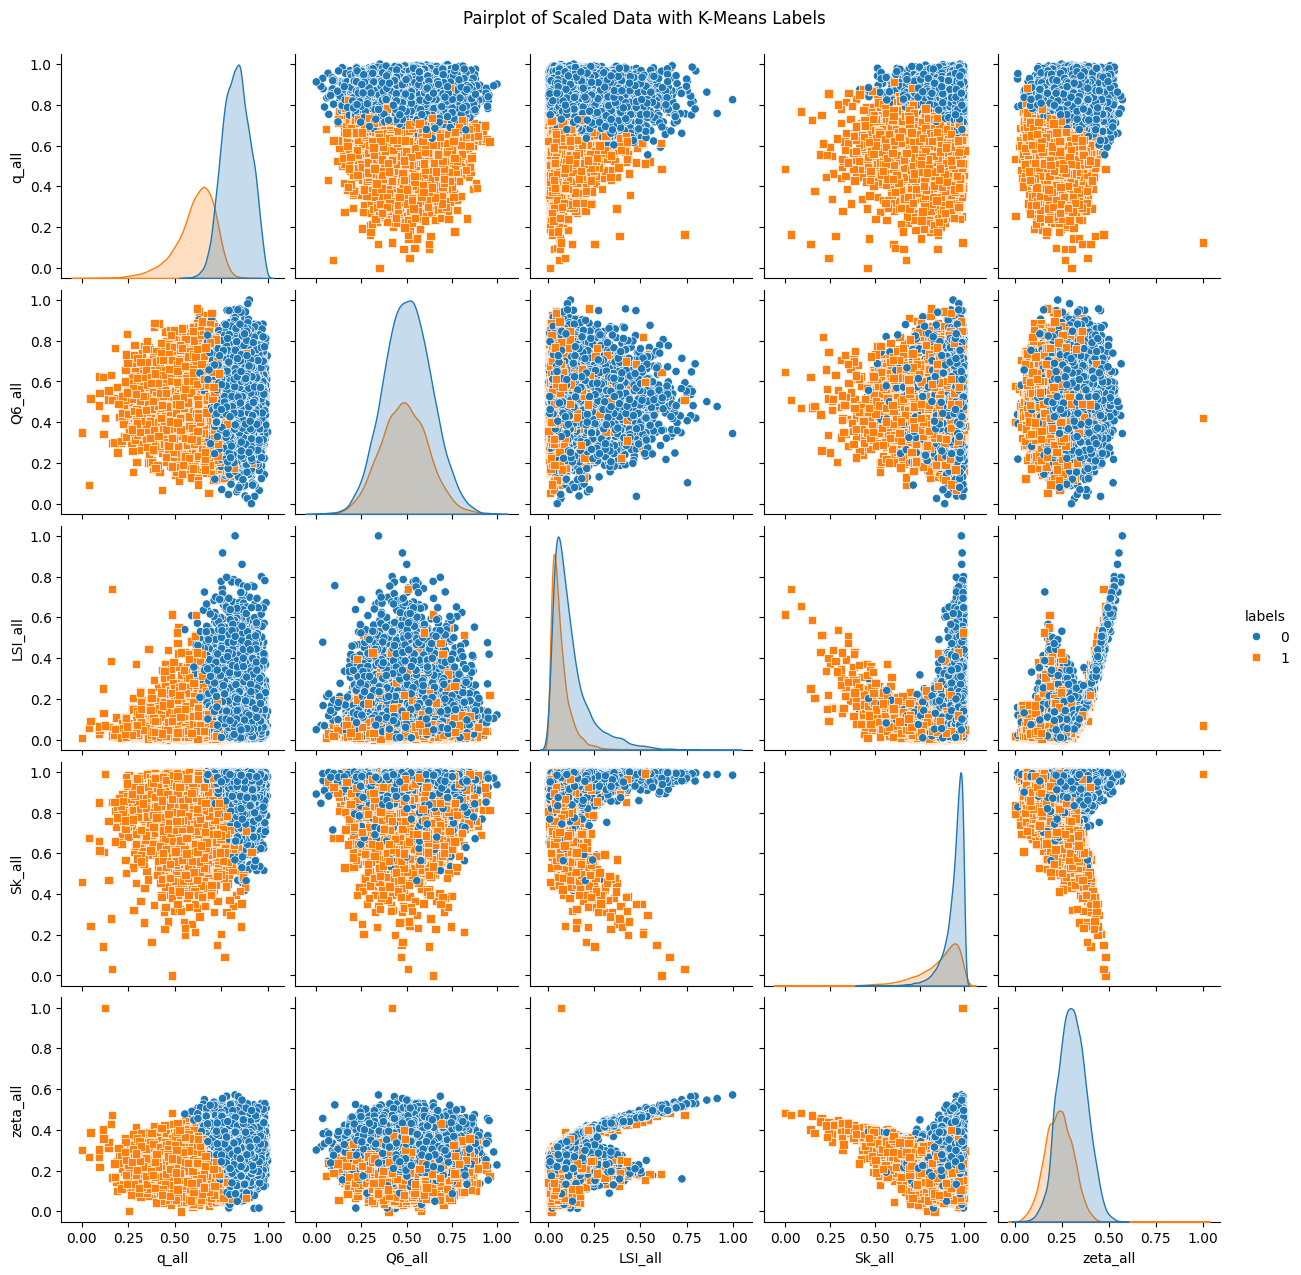

ValueError: num must be an integer with 1 <= num <= 4, not 5

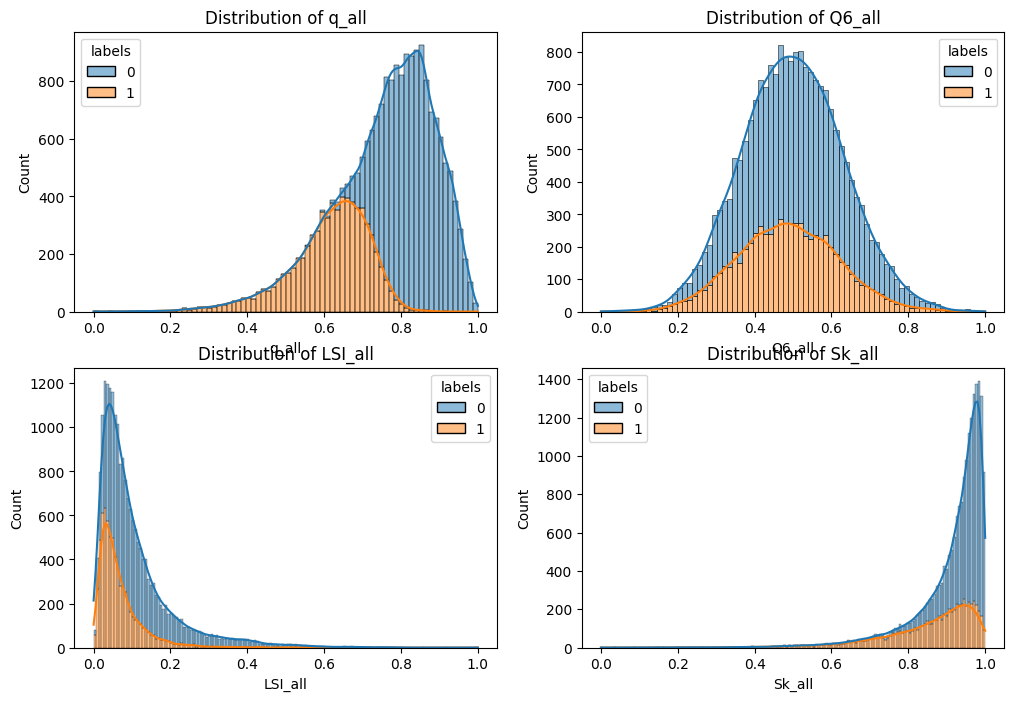

In [14]:
#df['Q6_all'] = np.log1p(df['Q6_all'])
#df['LSI_all'] = np.log1p(df['LSI_all'])
#df['Sk_all'] = np.log1p(df['Sk_all'])#

# K-Means Clustering with 2 clusters
t0 = time()
kmeans = cluster.KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)
t1 = time()
print(f"KMeans clustering time: {t1 - t0:.2f} sec")

# Add labels to the dataframe
df_scaled['labels'] = labels

# Evaluating the clustering
sil_score = silhouette_score(df_scaled.drop('labels', axis=1), labels)
print(f'Silhouette Score: {sil_score:.4f}')

# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s"])
plt.suptitle("Pairplot of Scaled Data with K-Means Labels", y=1.02)
plt.show()

# Plotting the distributions to see the actual data distribution
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='stack', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.suptitle("Distributions of Parameters", y=1.02)
plt.show()

# Plotting original (unscaled) data distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column} (Unscaled)')
plt.tight_layout()
plt.suptitle("Distributions of Original (Unscaled) Parameters", y=1.02)
plt.show()

KMeans: 0.049 sec
Silhouette Score: 0.24566671478417446


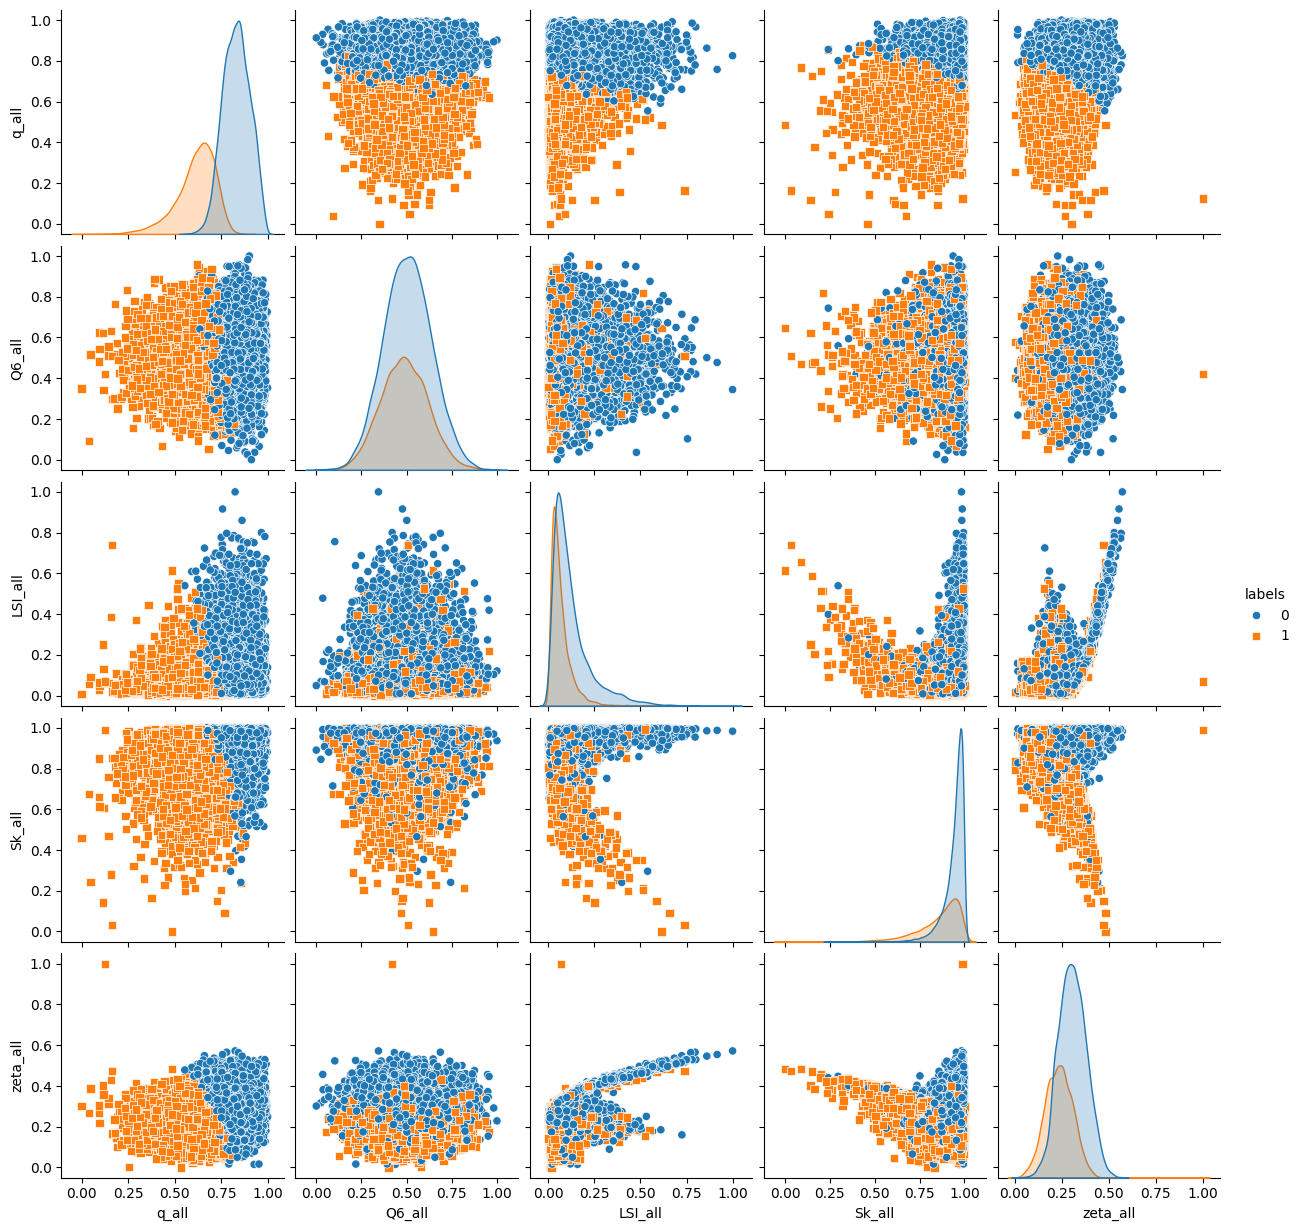

ValueError: num must be an integer with 1 <= num <= 4, not 5

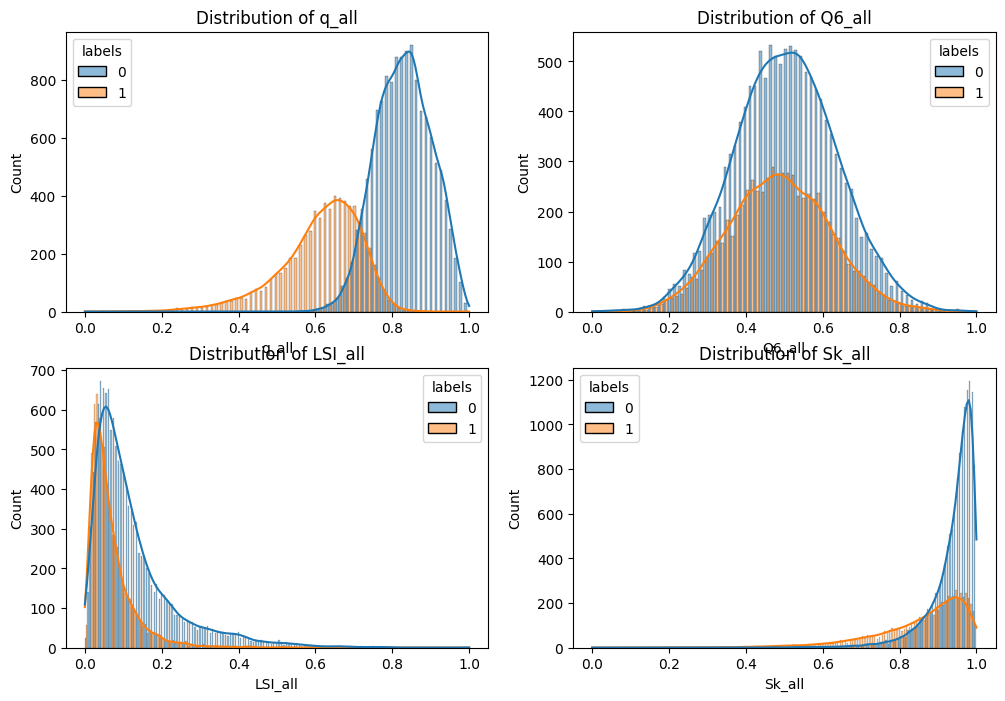

In [15]:
#df['q_all'] = np.log1p(df['q_all'])
#df['Q6_all'] = np.log1p(df['Q6_all'])
#df['LSI_all'] = np.log1p(df['LSI_all'])
#df['Sk_all'] = np.log1p(df['Sk_all'])

# Scaling the data again after transformation
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


# K-Means Clustering with 2 clusters
t0 = time()
kmeans = cluster.KMeans(n_clusters=2, random_state=0, init='k-means++', n_init=10)
kmeans.fit(df_scaled)
t1 = time()
print("KMeans: %.2g sec" % (t1 - t0))

# Assigning labels and adding to DataFrame
labels = kmeans.labels_
df_scaled['labels'] = labels

# Evaluating the clustering
sil_score = silhouette_score(df_scaled.drop('labels', axis=1), labels)
print(f'Silhouette Score: {sil_score}')

# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s"])
plt.show()

# Plotting the distributions to see the peaks
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='dodge', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

KMeans: 0.04 sec
Silhouette Score: 0.24566671478417446


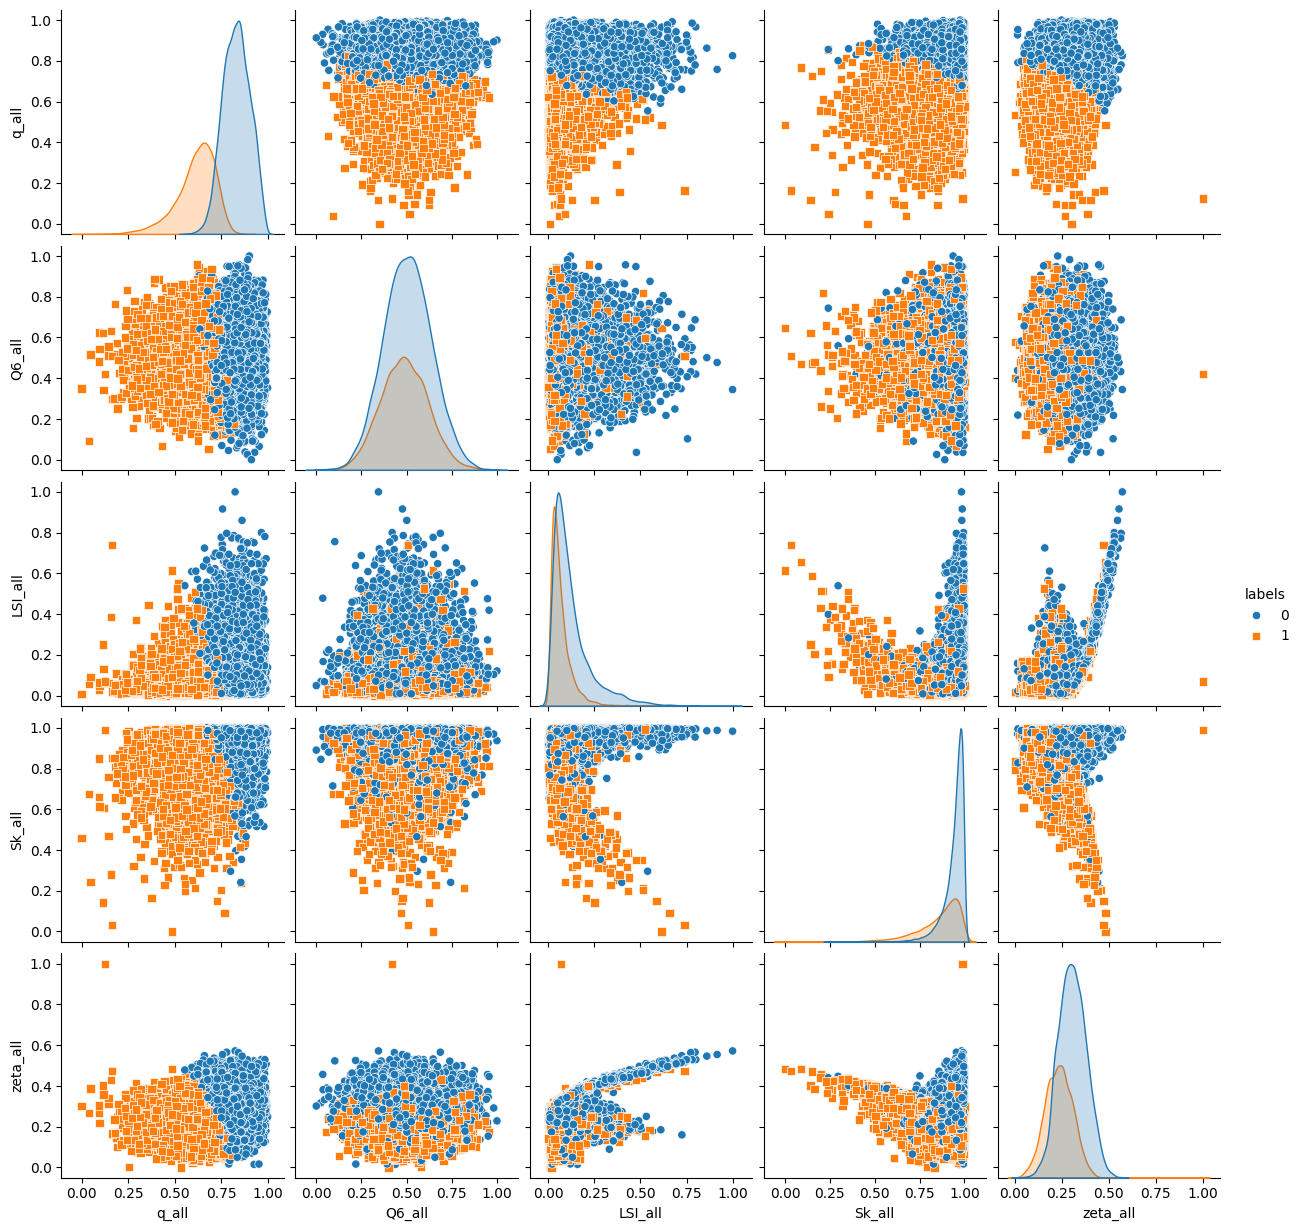

ValueError: num must be an integer with 1 <= num <= 4, not 5

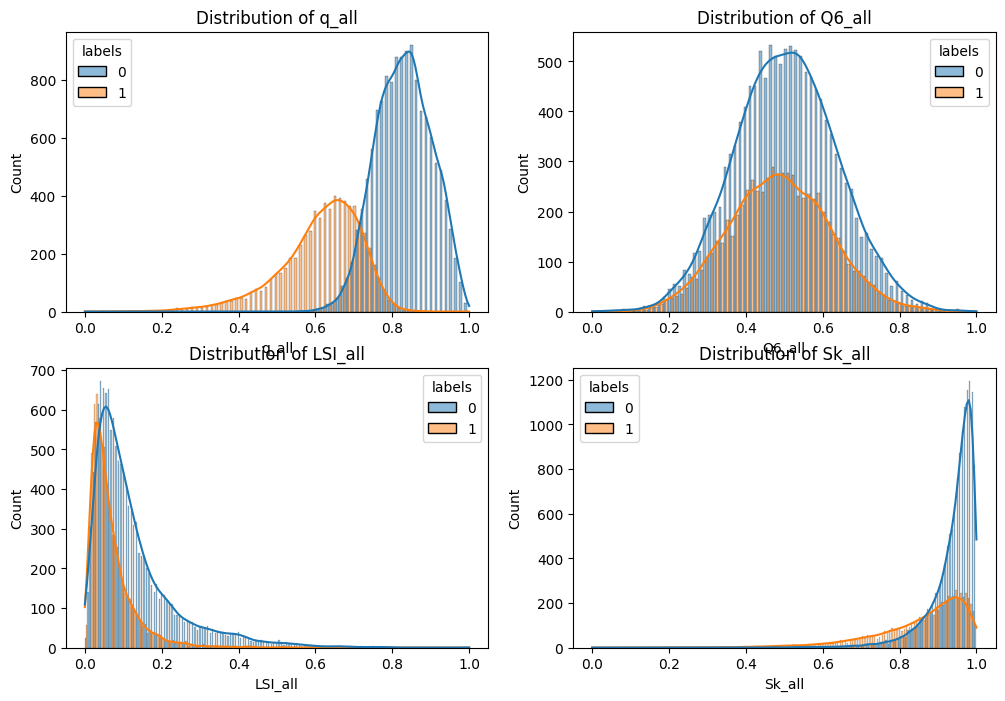

In [16]:
# K-Means Clustering with 2 clusters
t0 = time()
kmeans = cluster.KMeans(n_clusters=2, random_state=0, init='k-means++', n_init=20, max_iter=300)
kmeans.fit(df_scaled)
t1 = time()
print("KMeans: %.2g sec" % (t1 - t0))

# Assigning labels and adding to DataFrame
labels = kmeans.labels_
df_scaled['labels'] = labels

# Evaluating the clustering
sil_score = silhouette_score(df_scaled.drop('labels', axis=1), labels)
print(f'Silhouette Score: {sil_score}')

# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s"])
plt.show()

# Plotting the distributions to see the peaks
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='dodge', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

DBSCAN: 4.9 sec
Silhouette Score: 0.2456394073925444


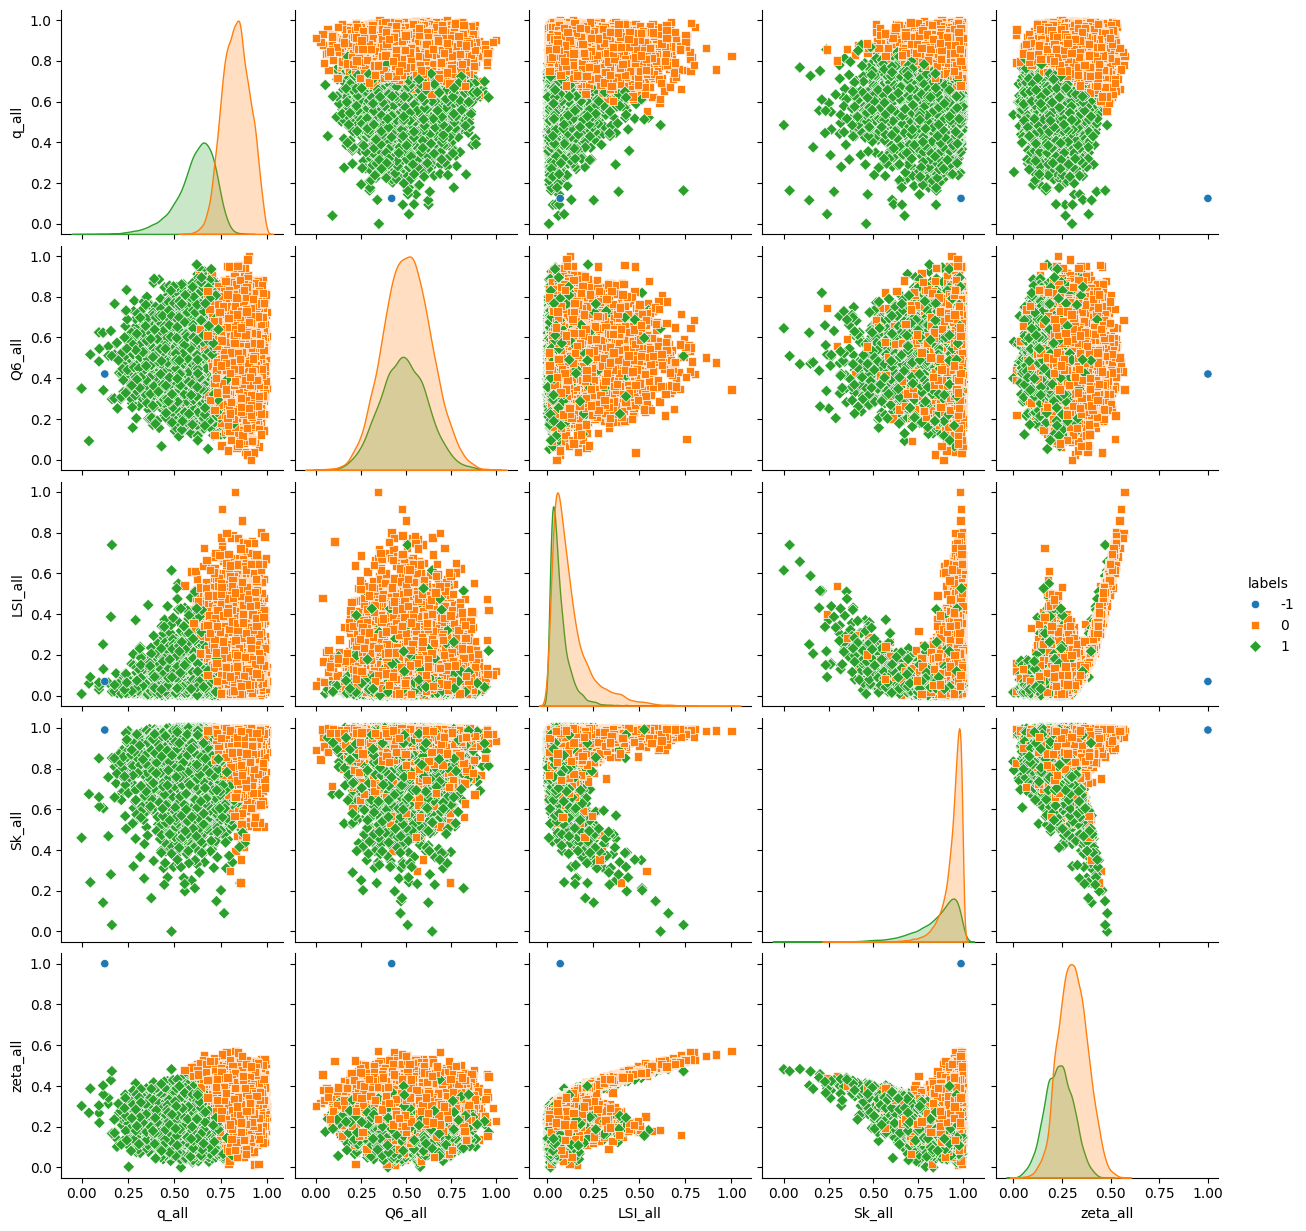

ValueError: num must be an integer with 1 <= num <= 4, not 5

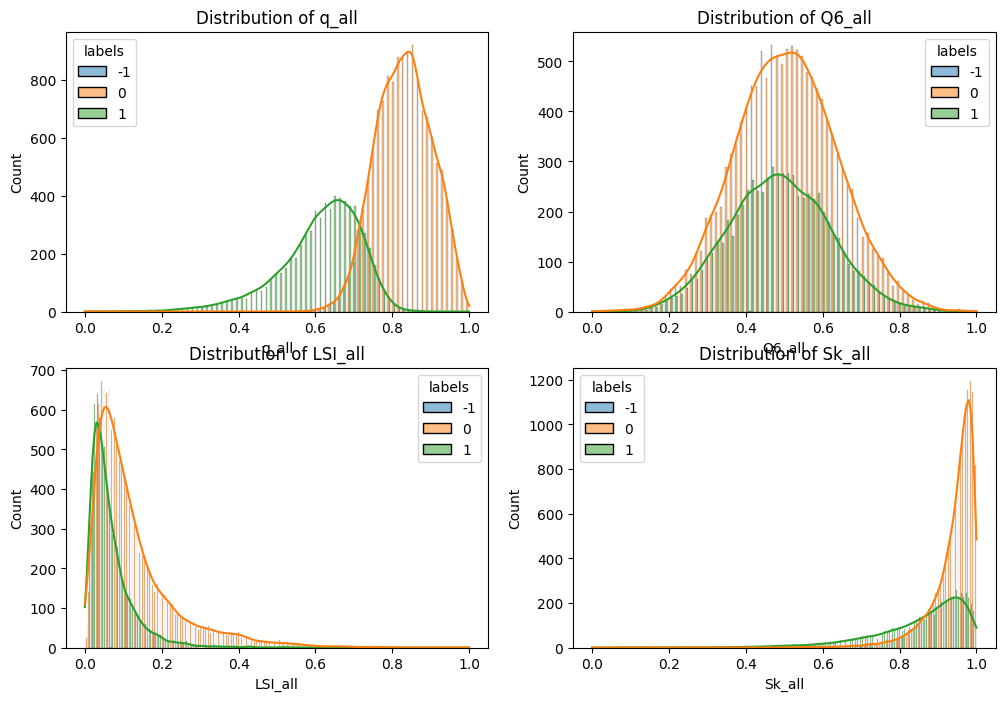

In [17]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering with optimized parameters
t0 = time()
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(df_scaled)
t1 = time()
print("DBSCAN: %.2g sec" % (t1 - t0))

# Add labels to the DataFrame
df_scaled['labels'] = labels

# Evaluating the clustering (Silhouette score may not be meaningful for DBSCAN)
# Calculate silhouette score for non-noise points
mask = labels != -1  # Exclude noise points
sil_score = silhouette_score(df_scaled[mask].drop('labels', axis=1), labels[mask]) if np.any(mask) else "N/A"
print(f'Silhouette Score: {sil_score}')

# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s", "D"], palette='tab10')
plt.show()

# Plotting the distributions to see the clusters
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='dodge', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Number of clusters: 2


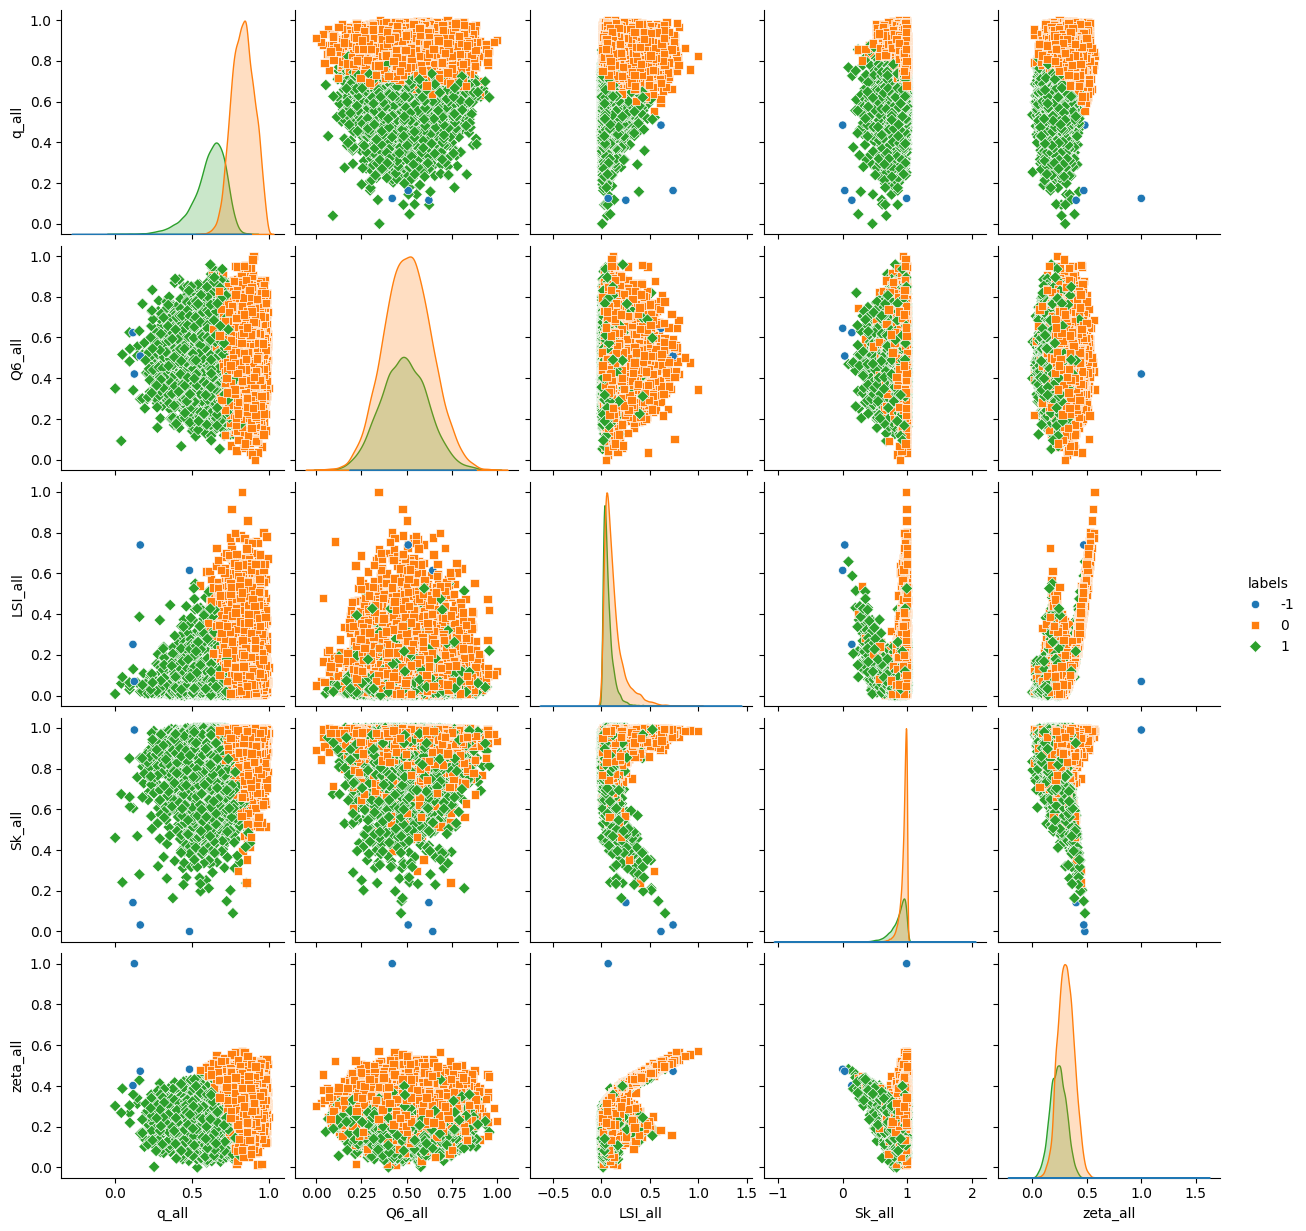

ValueError: num must be an integer with 1 <= num <= 4, not 5

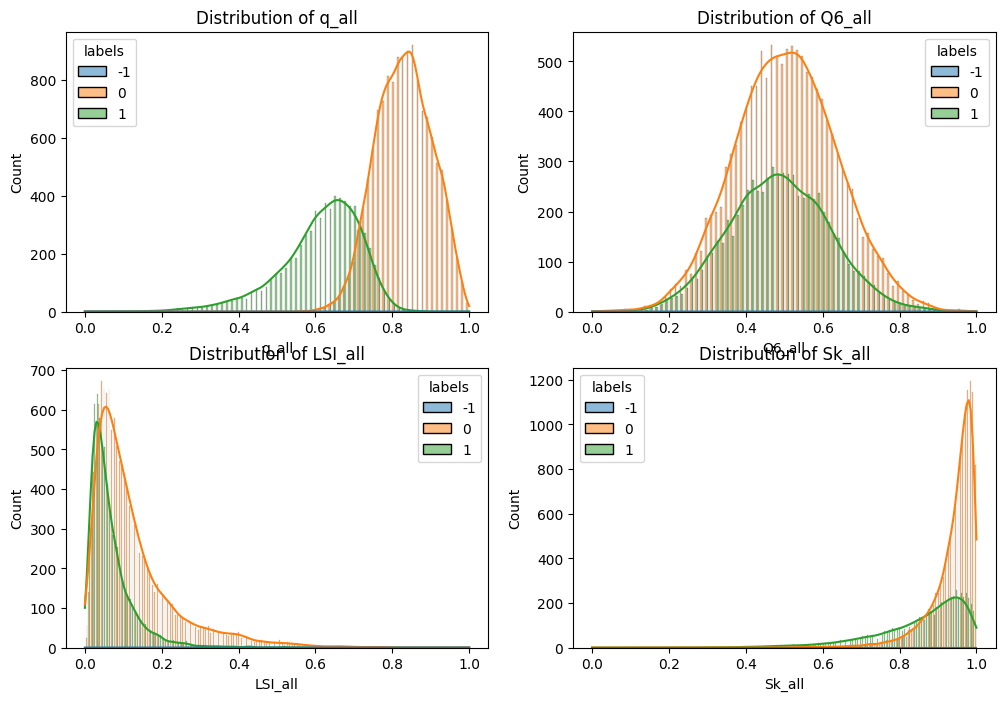

In [18]:
eps_value = 0.3  # Adjust as needed
min_samples_value = 5  # Adjust as needed

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(df_scaled)

# Add labels to the DataFrame
df_scaled['labels'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters_}')

# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s", "D"], palette='tab10')
plt.show()

# Plotting the distributions to see the clusters
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='dodge', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

# Generate markers based on the number of unique labels
unique_labels = np.unique(labels)
num_labels = len(unique_labels)
markers = ["o", "s", "D", "^", "v", "<", ">", "P", "X", "h"][:num_labels]  # Choose markers up to 10 unique clusters

# Plotting pairplot with dynamically generated markers
sns.pairplot(df_scaled, hue='labels', markers=markers)
plt.suptitle("Pairplot of Scaled Data with DBSCAN Labels", y=1.02)
plt.show()

# DBSCAN Clustering
t0 = time()
dbscan = cluster.DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on data characteristics
labels = dbscan.fit_predict(df_scaled)
t1 = time()
print(f"DBSCAN clustering time: {t1 - t0:.2f} sec")

# Add labels to the dataframe
df_scaled['labels'] = labels

# Evaluate the clustering with silhouette score (ignoring noise points labeled as -1)
if len(set(labels)) > 1:
    sil_score = silhouette_score(df_scaled.drop('labels', axis=1)[labels != -1], labels[labels != -1])
    print(f'Silhouette Score: {sil_score:.4f}')
else:
    print("Silhouette Score: Only one cluster found (or all points are noise).")

# Plotting pairplot with seaborn
sns.pairplot(df_scaled, hue='labels', markers=["o", "s"])
plt.suptitle("Pairplot of Scaled Data with DBSCAN Labels", y=1.02)
plt.show()

# Plotting the distributions to see the actual data distribution
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_scaled.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=column, hue='labels', multiple='stack', palette='tab10', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.suptitle("Distributions of Parameters with DBSCAN Labels", y=1.02)
plt.show()

# Plotting original (unscaled) data distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column} (Unscaled)')
plt.tight_layout()
plt.suptitle("Distributions of Original (Unscaled) Parameters", y=1.02)
plt.show()